Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Loading the dataset

In [2]:
wine_data = pd.read_csv("/content/winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking the structure of the dataset

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Visualizing data

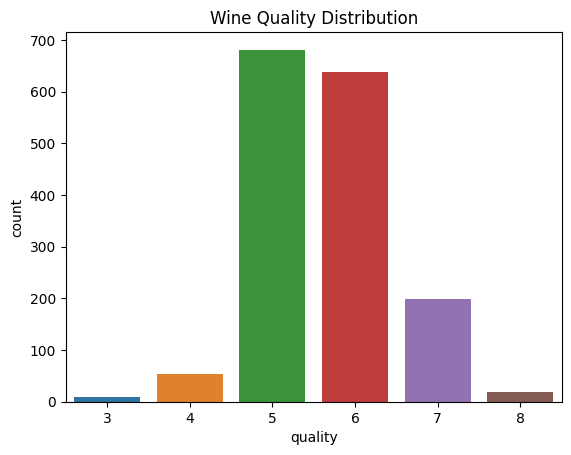

In [4]:
sns.countplot(x='quality', data=wine_data)
plt.title('Wine Quality Distribution')
plt.show()

Checking for outliers

In [15]:
#defining a function to replace outliers with median
def replace_outliers_with_median(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else df.median())

Removing the outliers

In [16]:
numerical_features = wine_data.select_dtypes(include=[np.number])
wine_data[numerical_features.columns] = wine_data[numerical_features.columns].apply(replace_outliers_with_median)

In [17]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.00000
mean,8.154534,0.520547,0.270513,2.181801,0.078773,15.163852,42.825516,0.996735,3.308799,0.63581,10.392798,5.63227
std,1.490883,0.165588,0.193945,0.426845,0.014335,9.140986,26.757870,0.001643,0.138951,0.11875,1.017398,0.74030
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.33000,8.400000,4.00000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995680,3.210000,0.55000,9.500000,5.00000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.62000,10.200000,6.00000
75%,9.000000,0.630000,0.420000,2.400000,0.086000,21.000000,58.000000,0.997800,3.400000,0.71000,11.000000,6.00000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,0.99000,13.500000,7.00000


In [18]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Splitting the dataset into features and target

In [20]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

Train-Test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

Feature Scaling

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Machine Learning model building

In [39]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

Evaluating the model

In [41]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [42]:
print(f'Accuracy: {accuracy}')
print(classification_rep)

Accuracy: 0.625
              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        37
         5.0       0.72      0.68      0.70       484
         6.0       0.58      0.68      0.63       473
         7.0       0.49      0.39      0.43       126

    accuracy                           0.62      1120
   macro avg       0.45      0.44      0.44      1120
weighted avg       0.61      0.62      0.61      1120



Test with a random observation

In [43]:
random_observation = pd.DataFrame({'fixed acidity': [7.5], 'volatile acidity': [0.5], 'citric acid': [0.36],
                                   'residual sugar': [6.1], 'chlorides': [0.071], 'free sulfur dioxide': [17.0],
                                   'total sulfur dioxide': [102.0], 'density': [0.994], 'pH': [3.0], 'sulphates': [0.6],
                                   'alcohol': [9.2]})
random_observation_scaled = scaler.transform(random_observation)
predicted_quality = model.predict(random_observation_scaled)
print(f'Predicted Wine Quality: {predicted_quality[0]}')

Predicted Wine Quality: 5.0
